In [155]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


### Read out address data and price data from csv

In [156]:
df = pd.read_csv('./housing/USA_Housing.csv')

# area_income = df.loc[:, ['']]
# area_income = area_income.values
# area_income = area_income[~np.isnan(area_income)]

housing_price = df.loc[:, ['Estimate!!Median value (dollars)']]
housing_price = housing_price.values
housing_price = housing_price[~np.isnan(housing_price)]

address = df.loc[:, ['Geographic Area Name']]
address = address.values

# address = address.tolist()


### split address into city, state, and postal code

In [157]:
counties = []
states = []


for addr in address:
    addr = addr[0]
    if addr.find(', ') != -1 :
        [county, state] = addr.split(', ', 2)
        
    counties.append(county)
    states.append(state)


In [158]:
state_counts = Counter(states)
state_names = list(state_counts.keys())
state_names.sort()

counts = list(state_counts.values())

print('There are ', len(state_names), ' states.')
print(state_counts.keys())

There are  52  states.
dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'])


In [159]:
states_dont_care = ['Puerto Rico']

There are  51  states.


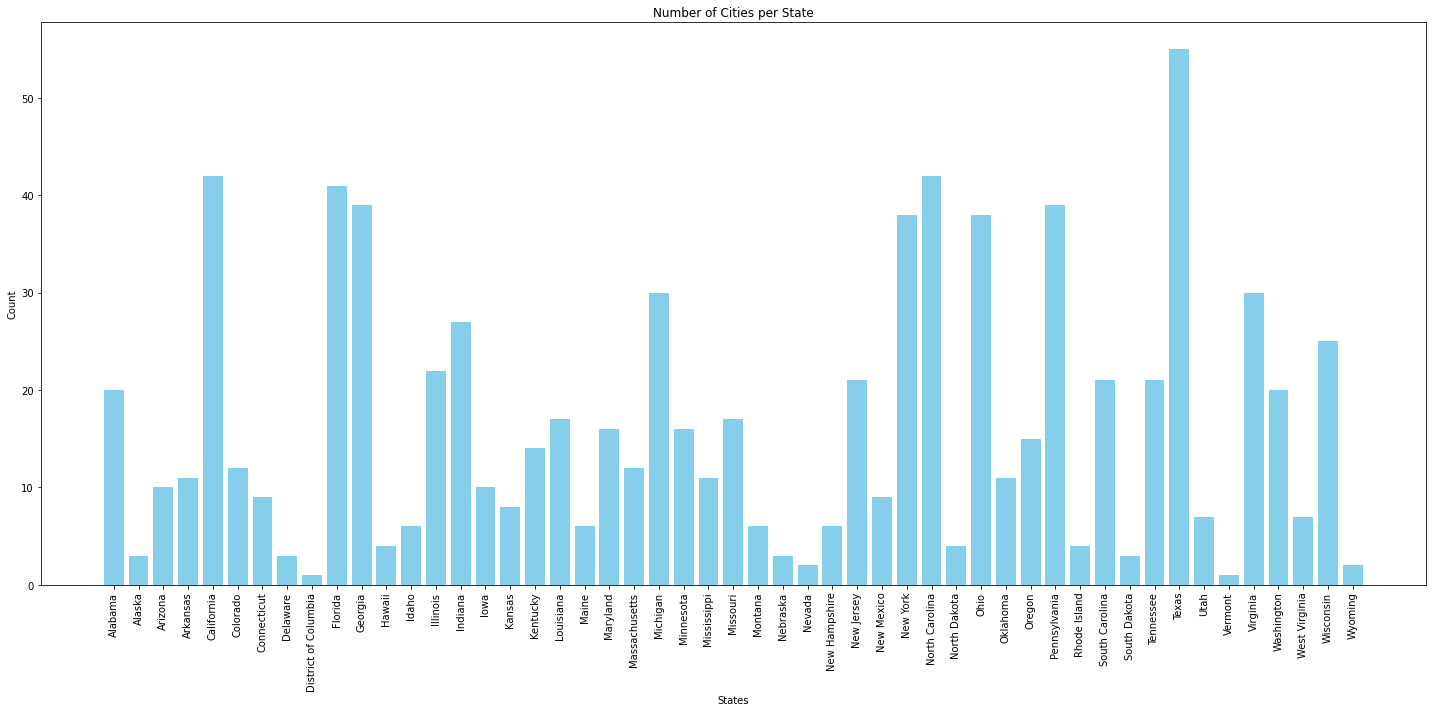

In [160]:
indices_to_keep = [i for i, j in enumerate(states) if j not in states_dont_care]

# Extract housing prices & income based on these indices
filtered_prices = [housing_price[idx] for idx in indices_to_keep]

# Filter the states based on the states_to_keep
filtered_states = [states[idx] for idx in indices_to_keep]
filtered_counties = [counties[idx] for idx in indices_to_keep]

state_counts = Counter(filtered_states)

# Extract states and their counts for plotting
state_names = list(state_counts.keys())
state_names.sort()

counts = list(state_counts.values())

print('There are ', len(state_names), ' states.')

# Plotting the histogram
plt.figure(figsize=(20, 10))
plt.bar(state_names, counts, color='skyblue')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Number of Cities per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [161]:
states_to_keep = state_names

### Mean & Variance

Whole USA Housing price, each data point represent a county

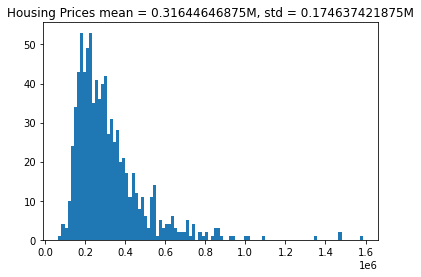

In [162]:
filtered_prices = np.array(filtered_prices, dtype=np.float32)
price_mean = np.mean(filtered_prices)
price_std = np.std(filtered_prices)
# "1 + 1 = %i" % num 
plt.title('Housing Prices mean = ' +str(price_mean/10**6) + 'M, std = ' + str(price_std/10**6) + 'M')
plt.hist(filtered_prices, bins = 100)
plt.show()

In [163]:
# state_price_dict.keys()

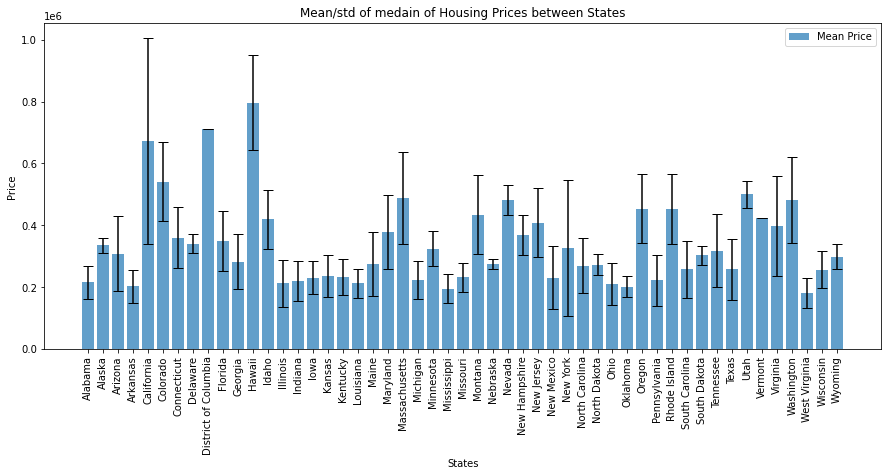

In [164]:
# Calculate mean and variance of housing prices for each state
# Create a dictionary to store prices for each state
state_price_dict = {state: [] for state in states_to_keep}



# Group prices by state
for i, state in enumerate(states):
#     print(state_price_dict[state])
    if state in states_to_keep:
        state_price_dict[state].append(housing_price[i])

# Calculate mean and variance for each state
state_means = [np.mean(prices) for state, prices in state_price_dict.items()]
state_std = [np.std(prices) for state, prices in state_price_dict.items()]

# Plotting mean and variance
plt.figure(figsize=(15, 6))

plt.bar(state_price_dict.keys(), state_means, yerr=state_std, capsize=5, alpha=0.7, label='Mean Price')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Price')
plt.title('Mean/std of medain of Housing Prices between States')
plt.legend()
# plt.ylim([0.7*10**6, 1.8*10**6])

plt.show()

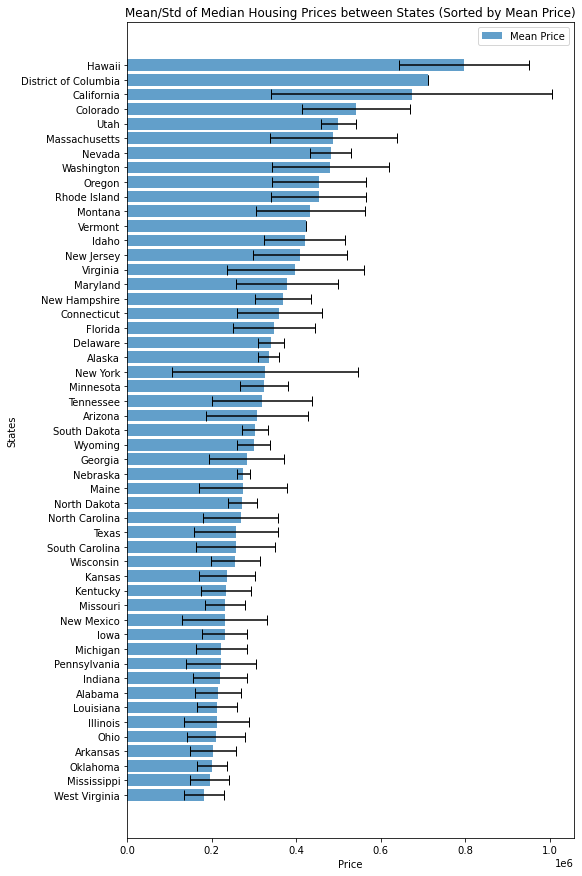

In [165]:
# Sort states based on mean prices
sorted_states = [state for _, state in sorted(zip(state_means, state_price_dict.keys()), reverse=False)]
sorted_means = sorted(state_means, reverse=False)
sorted_std = [state_std[list(state_price_dict.keys()).index(state)] for state in sorted_states]

plt.figure(figsize=(8, 15))

plt.barh(sorted_states, sorted_means, xerr=sorted_std, capsize=5, alpha=0.7, label='Mean Price')
plt.xlabel('Price')
plt.ylabel('States')
plt.title('Mean/Std of Median Housing Prices between States (Sorted by Mean Price)')
plt.legend()

plt.savefig('housing_prices_by_state.png', bbox_inches='tight')  # Change the filename and format as needed

plt.show()

### Update and Store New csv

In [166]:
# Define column names
columns = ['State', 'Mean of Median of housing price']

# Create a DataFrame with specified column names
data = {
    'State': states_to_keep,
    'Mean of Median of housing price': state_means
}

df = pd.DataFrame(data, columns=columns)

# Save DataFrame to a CSV file
df.to_csv('filtered_housing_prices.csv', index=False) 

In [167]:
# Define column names
columns = ['State', 'County', 'Median of housing price']

# Create a DataFrame with specified column names
data = {
    'State': filtered_states,
    'County': filtered_counties,
    'Median of housing price': filtered_prices
}

df = pd.DataFrame(data, columns=columns)

# Save DataFrame to a CSV file
df.to_csv('detailed_housing_prices.csv', index=False) 

In [168]:
df

,State,County,Median of housing price
0,Alabama,Baldwin County,304600.0
1,Alabama,Calhoun County,148100.0
2,Alabama,Cullman County,184800.0
3,Alabama,DeKalb County,157700.0
4,Alabama,Elmore County,204700.0
...,...,...,...
832,Wisconsin,Waukesha County,379700.0
833,Wisconsin,Winnebago County,207200.0
834,Wisconsin,Wood County,177100.0
835,Wyoming,Laramie County,338100.0


### Corelation between Wage v.s. housing price

In [169]:
df = pd.read_csv('./filtered_state_M2022_dl.csv')


Mean_annual_wage = []

for index, row in df.iterrows():
#     print(f"Row {index}:")
#     print(row)
    if row['OCC_CODE'] == '00-0000' and row['AREA_TITLE'] in  states_to_keep:
        Mean_annual_wage.append(row['A_MEAN'])

#  = df.loc[:, ['Estimate!!Median value (dollars)']]
# housing_price = housing_price.values
# housing_price = housing_price[~np.isnan(housing_price)]

# address = df.loc[:, ['Geographic Area Name']]
# address = address.values

In [170]:
len(Mean_annual_wage)

51

In [171]:
price_mean = state_means
# # Plotting mean and variance
# plt.figure(figsize=(15, 6))
# plt.bar(state_price_dict.keys(), Mean_annual_wage, capsize=5, alpha=0.7, yerr= 0, label='Mean Anaul wage')
# plt.xticks(rotation=90)
# plt.xlabel('States')
# plt.ylabel('wage')
# plt.title('Mean Anaul wage between States')
# plt.legend()
# # plt.ylim([0.7*10**6, 1.8*10**6])

# plt.show()
correlation_coefficients = np.corrcoef(Mean_annual_wage, price_mean)
print('correlation_coefficients:\n', correlation_coefficients)

covariance = np.cov(Mean_annual_wage, price_mean)

print('covariance:\n', covariance[1][0])

correlation_coefficients:
 [[1.         0.65362697]
 [0.65362697 1.        ]]
covariance:
 863022131.8411645


### Generate Some tables for report

In [172]:
state_means = {state: np.mean(prices) for state, prices in state_price_dict.items()}

# Sort states by mean price in descending order
sorted_states = sorted(state_means.items(), key=lambda x: x[1], reverse=True)

# Select top 3 states with highest mean prices
top_3_states = sorted_states[:3]

# Extract top 3 state names and their mean prices
top_3_state_names = [state[0] for state in top_3_states]
top_3_state_mean_prices = [state[1] for state in top_3_states]

# Create a DataFrame to display top 3 states and their mean prices
data = {'State': top_3_state_names, 'Mean Price': top_3_state_mean_prices}
df = pd.DataFrame(data)

# Display the table
print('Top 3 states with highest house price ')
df

Top 3 states with highest house price 


,State,Mean Price
0,Hawaii,796850.000000
1,District of Columbia,711100.000000
2,California,673135.714286


In [173]:
state_std = {state: np.std(prices) for state, prices in state_price_dict.items()}

# Sort states by mean price in descending order
sorted_states = sorted(state_std.items(), key=lambda x: x[1], reverse=True)

# Select top 3 states with highest mean prices
top_3_states = sorted_states[:3]

# Extract top 3 state names and their mean prices
top_3_state_names = [state[0] for state in top_3_states]
top_3_state_std_prices = [state[1] for state in top_3_states]

# Create a DataFrame to display top 3 states and their mean prices
data = {'State': top_3_state_names, 'std Price': top_3_state_std_prices}
df = pd.DataFrame(data)

# Display the table
print('Top 3 states with highest std house price ')
df

Top 3 states with highest std house price 


,State,std Price
0,California,332518.756235
1,New York,219611.832783
2,Virginia,161939.156750
